In [39]:
import itertools
import pandas as pd
import seaborn as sns
import yaml

In [30]:
use_id = "a0246a17"
probes_per_block = 3
df = pd.read_csv(f"materials/{use_id}/{use_id}-sentences-manual.csv", index_col=[0, 1])

In [5]:
with open(f"probes.yaml") as f:
    probe_annotations = yaml.safe_load(f)

In [13]:
probe_df = pd.DataFrame(
    [{"sentence": sentence, "probe": probe, "answer": answer}
     for sentence, probes_i in probe_annotations.items()
     for answer, probes_ij in (probes_i or {}).items()
     for probe in probes_ij])
probe_df

,sentence,probe,answer
0,America is the land of milk and honey.,Is the last sentence about Germany?,N
1,America is the land of milk and honey.,Is the last sentence about America?,Y
2,"Beneath the CEO title, he was a slave.",Does this imply he was truly free?,N
3,"Beneath the CEO title, he was a slave.",Does this imply he felt oppressed?,Y
4,But you can't conceivably allow that goal!,Is the speaker supportive of the goal?,N
5,But you can't conceivably allow that goal!,Is the speaker against the goal?,Y
6,Can we have a drink of water?,Does this person want milk?,N
7,Can we have a drink of water?,Does this person want water?,Y
8,Did you ever smoke?,Is this asking about drinking habits?,N
9,Did you ever smoke?,Is this asking about smoking habits?,Y


In [25]:
probe_df_merged = pd.merge(df[["sentence"]].reset_index(), probe_df, on="sentence", how="inner") \
    .set_index(["block", "level_1"])
probe_df_merged

sentence  \
block level_1                                               
0     311          America is the land of milk and honey.   
      311          America is the land of milk and honey.   
      433                             Did you ever smoke?   
      433                             Did you ever smoke?   
      587                   Can we have a drink of water?   
      587                   Can we have a drink of water?   
1     8             It's a stone indigenous to this area.   
      8             It's a stone indigenous to this area.   
      38        Does anybody here have type O or A blood?   
      38        Does anybody here have type O or A blood?   
      584                She's spending money like water.   
      584                She's spending money like water.   
2     93                    Look, she left a potato chip.   
      93                    Look, she left a potato chip.   
      264      But you can't conceivably allow that goal!   
      264      But you can't conceivably allow that goal!   
      625                    I made it out of balsa wood.   
      633           He studied choral music in his youth.   
      633           He studied choral music in his youth.   
3     156                       I'm with the flight crew.   
      237             Honestly, I'm kind of on the fence.   
      237             Honestly, I'm kind of on the fence.   
      287                  Oh, I could take a wild guess.   
      287                  Oh, I could take a wild guess.   
      670          Beneath the CEO title, he was a slave.   
      670          Beneath the CEO title, he was a slave.   

                                                   probe answer  
block level_1                                                    
0     311            Is the last sentence about Germany?      N  
      311            Is the last sentence about America?      Y  
      433          Is this asking about drinking habits?      N  
      433           Is this asking about smoking habits?      Y  
      587                    Does this person want milk?      N  
      587                   Does this person want water?      Y  
1     8                 Is the stone from another place?      N  
      8                     Is the stone from this area?      Y  
      38            Was the last sentence about finance?      N  
      38            Did the last sentence involve blood?      Y  
      584                           Is she saving money?      N  
      584                         Is she spending money?      Y  
2     93          Did she leave behind a piece of paper?      N  
      93           Did she leave behind a piece of food?      Y  
      264         Is the speaker supportive of the goal?      N  
      264               Is the speaker against the goal?      Y  
      625                      Was it made out of metal?      N  
      633      Did the last sentence involve vegetables?      N  
      633           Did the last sentence involve music?      Y  
3     156                    Is the speaker a passenger?      N  
      237                   Is the speaker very certain?      N  
      237                         Is the speaker unsure?      Y  
      287                        Is the speaker certain?      N  
      287                      Is the speaker uncertain?      Y  
      670             Does this imply he was truly free?      N  
      670             Does this imply he felt oppressed?      Y

In [32]:
available_probes_by_block = probe_df_merged.reset_index().groupby(["block"]).level_1.nunique()
assert (available_probes_by_block >= probes_per_block).all()
available_probes_by_block

block
0    3
1    3
2    4
3    4
Name: level_1, dtype: int64

In [37]:
# Subsample
probe_df_subsample = probe_df_merged \
    .groupby(["block", "level_1"]).sample(1) \
    .groupby("block").sample(probes_per_block)
probe_df_subsample

sentence  \
block level_1                                               
0     587                   Can we have a drink of water?   
      311          America is the land of milk and honey.   
      433                             Did you ever smoke?   
1     584                She's spending money like water.   
      8             It's a stone indigenous to this area.   
      38        Does anybody here have type O or A blood?   
2     633           He studied choral music in his youth.   
      93                    Look, she left a potato chip.   
      264      But you can't conceivably allow that goal!   
3     156                       I'm with the flight crew.   
      670          Beneath the CEO title, he was a slave.   
      237             Honestly, I'm kind of on the fence.   

                                                probe answer  
block level_1                                                 
0     587                Does this person want water?      Y  
      311         Is the last sentence about Germany?      N  
      433        Is this asking about smoking habits?      Y  
1     584                        Is she saving money?      N  
      8              Is the stone from another place?      N  
      38         Was the last sentence about finance?      N  
2     633        Did the last sentence involve music?      Y  
      93        Did she leave behind a piece of food?      Y  
      264      Is the speaker supportive of the goal?      N  
3     156                 Is the speaker a passenger?      N  
      670          Does this imply he was truly free?      N  
      237                      Is the speaker unsure?      Y

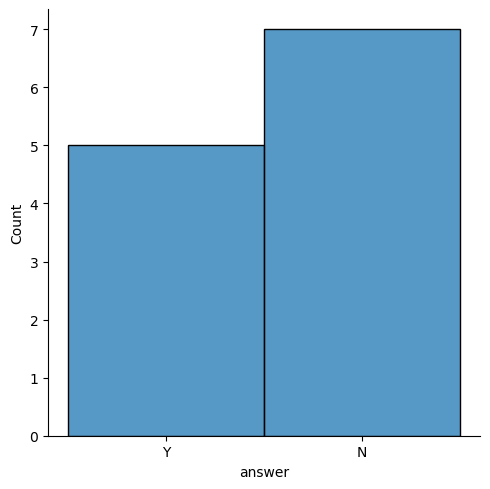

In [40]:
sns.displot(data=probe_df_subsample, x="answer")

In [41]:
probe_df_subsample.to_csv(f"materials/{use_id}/{use_id}-probes.csv")